Kaggle : https://www.kaggle.com/kumarajarshi/life-expectancy-who

## İçerik

>### [1. Data Setinin Konusu ve Datadaki Featurelar](#1)
>### [2. Veriyi Tanıma](#2)
>### [3. Explorer Data Analysis (EDA)](#3)
>### [4. Veri Görselleştirme](#4)
>### [5. Regression](#5)
  >> ### [5.1. Linear Regression](#6)
  >> ### [5.2  Random Forest Regression](#7)
>### [6. Supervised ML Algorithm](#8)
  >> ### [6.1. KNN](#9)
  >> ### [6.2. Desicion Tree](#10)
  >> ### [6.3. Random search](#11)
  >> ### [6.4. Support Vector Machines](#12)
  >> ### [6.5. Boosting with XGBOOST](#13)
  >> ### [6.5. Boosting with Light GBM](#14)

<a id="1"></a>
## 1. Data Setinin Konusu : 193 ülke için 2000-2015 yılı verilerle Yaşam Beklentisi ile ilgili tahminlerin yapılması 

> Ortalama Yaş beklentisini bulma

> Kaç yaşına kadar yaşayacak

### Featureslar

##### * Country           --> 193 uniqeu değer 
##### * Year    
##### * Status            --> Developed or Developing
##### * Life expectancy   --> Yaş
##### * Adult Mortality   --> erişkin ölüm oranı 
##### * infant deaths     --> Bebek ölümleri (nüfus başına düşen)
##### * Alcohol           --> Tüketilen alkol miktarı 
##### * Percentage expenditure    --> Kişi başına yüzde olarak sağlık harcaması
##### * Hepatitis B               --> Hepatit B (HepB) aşılama kapsamı (%)
##### * Measles                   --> Kızamık - 1000 nüfus başına bildirilen vaka sayısı
##### * BMI                       --> Tüm nüfusun Ortalama Vücut Kitle İndeksi
##### * Under-five deaths         --> 1000 nüfus başına beş yaş altı ölüm sayısı
##### * Polio                     --> çocuk felci 
##### * Total expenditure         --> Sağlıkla ilgili genel devlet harcamaları, toplam devlet harcamalarının yüzdesi
##### * Diphtheria                --> difteri tetanoz toksoid ve boğmaca (DTP3) aşı kapsamı
##### * HIV/AIDS                  --> 1000 canlı doğumda ölüm HIV/AIDS (0-4 yaş)
##### * GDP                       --> Kişi Başına Gayri Safi Yurtiçi Hasıla (ABD Doları)
##### * Population                --> Ülkenin nüfusu
##### * Thinness  1-19 years      --> 10 ila 19 yaş arası çocuklar ve ergenler arasında zayıflık prevalansı
##### * Thinness 5-9 years        --> 5-9 yaş arası çocuklarda zayıflık prevalansı
##### * Income composition of resources  --> Kaynakların gelir bileşimi açısından İnsani Gelişme Endeksi (0 ile 1 arasında değişen endeks)
##### * Schooling                        --> Okul Yılları Sayısı(yıl)

### Veri seti aşağıdaki temel soruları yanıtlamayı amaçlamaktadır:

1. Başlangıçta seçilen çeşitli tahmin faktörleri Yaşam beklentisini gerçekten etkiler mi? 

2. Yaşam beklentisini gerçekten etkileyen tahmin değişkenleri nelerdir?


3. Daha düşük yaşam beklentisi değerine (<65) sahip bir ülke, ortalama yaşam süresini iyileştirmek için sağlık harcamalarını artırmalı mı?

4. Bebek ve Yetişkin ölüm oranları yaşam beklentisini nasıl etkiler?

5. Yaşam Beklentinin yeme alışkanlıkları, yaşam tarzı, egzersiz, sigara, alkol vb. ile pozitif veya negatif bir ilişkisi var mı?

6. Eğitimin insan ömrüne etkisi nedir?

7. Yaşam Beklentinin alkol içmekle olumlu veya olumsuz bir ilişkisi var mı?


8. Yoğun nüfuslu ülkeler daha düşük yaşam beklentisine sahip olma eğiliminde midir?


9. Aşı kapsamının yaşam beklentisi üzerindeki etkisi nedir?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
## 2. Veriyi Tanıma 

In [ ]:
# Datasetini okuma
path = "/content/Life Expectancy Data.csv"
df = pd.read_csv(path)
df.head(3) # ilk 2 dataya bakma

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

> Datada boşluklar mevcut. Bu boşlukları EDA kısmında dolduracağız

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.columns # featurees isimleri

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.nunique() #her featureın uniqe değeri

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [ ]:
print(df["Status"].value_counts(dropna=False)) 

Developing    2426
Developed      512
Name: Status, dtype: int64


#### Tek değişkenli analiz

In [ ]:
# veri setindeki kategorik değişkenler
df.describe(include=['O'])

,Country,Status
count,2938,2938
unique,193,2
top,United Republic of Tanzania,Developing
freq,16,2426


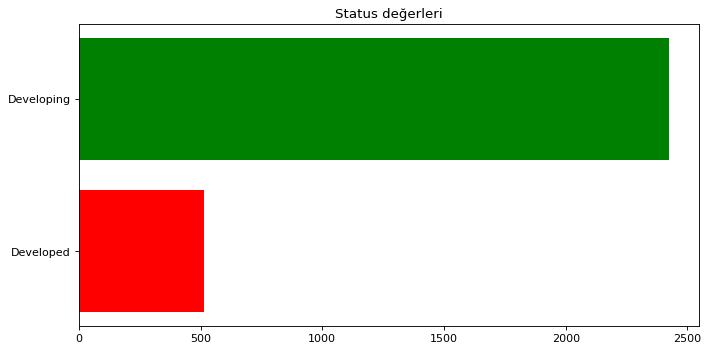

In [ ]:
plt.figure(figsize=(10,5), dpi=80)
plt.barh(df.groupby("Status")["Status"].count().index, 
        df.groupby("Status")["Status"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Status değerleri")

plt.show()

### Corelation Map

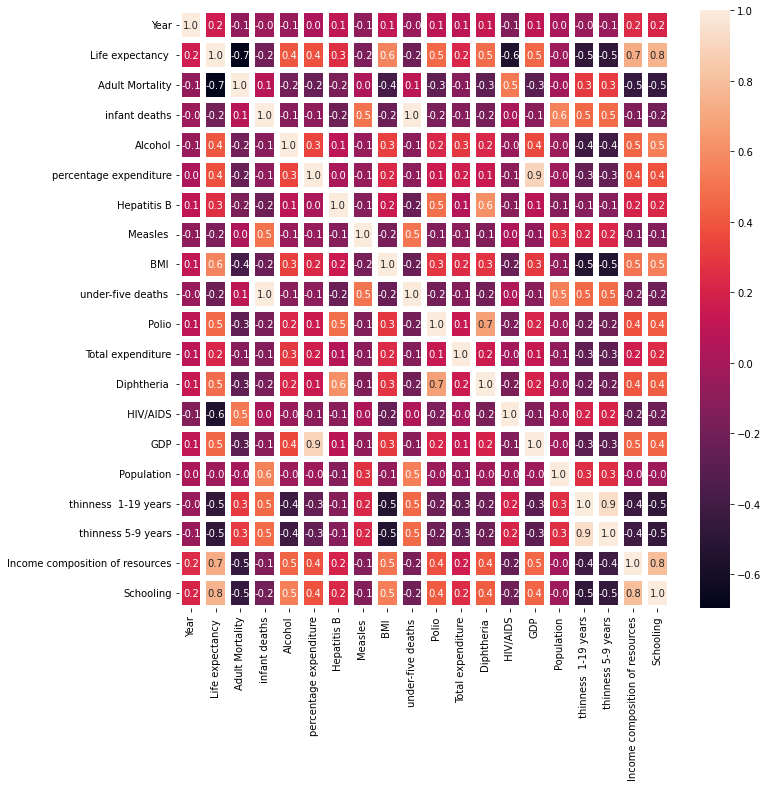

In [ ]:
f,ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(), annot=True, linewidths=5, fmt= '.1f', ax=ax)

Correlation Tablosuna baktığımızda : 

* Life expectancy --> Adult mortality ile -0.7 ile **negatif** cor , Schooling (0.8) ve Income composition of resources (0.7) ile **pozitiif** cor olduğu

* percentage expenditure --> GDP ile 0.9 **pozitif** cor,

* Hepatitis B ---> Diphtheria ile 0.6 **pozitif** cor, 

* Polio   ---> Diphtheria ile 0.7 **pozitif** cor olduğu gözlemlenmiştir



<a id="3"></a>
## 3. EDA Explorer Data Analysis

### Missing Value

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#####Görüldüğü gibi oldukça eksik veriler mevcut. Bu verileri dolduralım 

In [ ]:
df["Life expectancy "].iloc[np.where(np.isnan(df["Life expectancy "]))]

624    NaN
769    NaN
1650   NaN
1715   NaN
1812   NaN
1909   NaN
1958   NaN
2167   NaN
2216   NaN
2713   NaN
Name: Life expectancy , dtype: float64

In [ ]:
print(df["Life expectancy "][622])
print(df["Life expectancy "][623])
print(df["Life expectancy "][625])
print(df["Life expectancy "][626])

52.7
52.9
79.6
79.5


In [ ]:
df["Life expectancy "][624]

nan

##### Life expectancy feature için alttaki ve üstündeki verilerin ortalamasını alarak, boş değerleri doldurabiliriz 

In [ ]:
df["Life expectancy "][624] = ( df["Life expectancy "][623] + df["Life expectancy "][625] ) / 2
df["Life expectancy "][769] = ( df["Life expectancy "][768] + df["Life expectancy "][770] ) / 2
df["Life expectancy "][1650] = ( df["Life expectancy "][1649] + df["Life expectancy "][1651] ) / 2
df["Life expectancy "][1715] = ( df["Life expectancy "][1714] + df["Life expectancy "][1716] ) / 2
df["Life expectancy "][1812] = ( df["Life expectancy "][1811] + df["Life expectancy "][1813] ) / 2
df["Life expectancy "][1909] = ( df["Life expectancy "][1908] + df["Life expectancy "][1910] ) / 2
df["Life expectancy "][1958] = ( df["Life expectancy "][1957] + df["Life expectancy "][1959] ) / 2
df["Life expectancy "][2167] = ( df["Life expectancy "][2166] + df["Life expectancy "][2168] ) / 2
df["Life expectancy "][2216] = ( df["Life expectancy "][2215] + df["Life expectancy "][2217] ) / 2
df["Life expectancy "][2713] = ( df["Life expectancy "][2712] + df["Life expectancy "][2714] ) / 2

In [ ]:
df["Adult Mortality"].iloc[np.where(np.isnan(df["Adult Mortality"]))]

624    NaN
769    NaN
1650   NaN
1715   NaN
1812   NaN
1909   NaN
1958   NaN
2167   NaN
2216   NaN
2713   NaN
Name: Adult Mortality, dtype: float64

In [ ]:
print(df["Adult Mortality"][623])
print(df["Adult Mortality"][625])

416.0
95.0


##### Adult Mortality feature için alttaki ve üstündeki verilerin arasında oldukça fark olduğu için bu iki verinin ortalaması ile doldurmak mantıklı olmayacaktır 

In [ ]:
df["Adult Mortality"].describe()

count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64

In [ ]:
df["Adult Mortality"].fillna(df["Adult Mortality"].mean(), inplace=True)
df["Alcohol"].fillna(df["Alcohol"].mean(), inplace=True)
df["Hepatitis B"].fillna(df["Hepatitis B"].mean(), inplace=True)
df[" BMI "].fillna(df[" BMI "].mean(), inplace=True)
df["Polio"].fillna(df["Polio"].mean(), inplace=True)
df["Total expenditure"].fillna(df["Total expenditure"].mean(), inplace=True)
df["Diphtheria "].fillna(df["Diphtheria "].mean(), inplace=True)
df["GDP"].fillna(df["GDP"].mean(), inplace=True)
df["Population"].fillna(df["Population"].mean(), inplace=True)
df[" thinness  1-19 years"].fillna(df[" thinness  1-19 years"].mean(), inplace=True)
df[" thinness 5-9 years"].fillna(df[" thinness 5-9 years"].mean(), inplace=True)
df["Income composition of resources"].fillna(df["Income composition of resources"].mean(), inplace=True)
df["Schooling"].fillna(df["Schooling"].mean(), inplace=True)

 

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Tüm eksik verileri doldurduk ve verimizde eksik değer kalmadı.
Yeni değerlerle corelasyon tablomuza yeniden bakalım

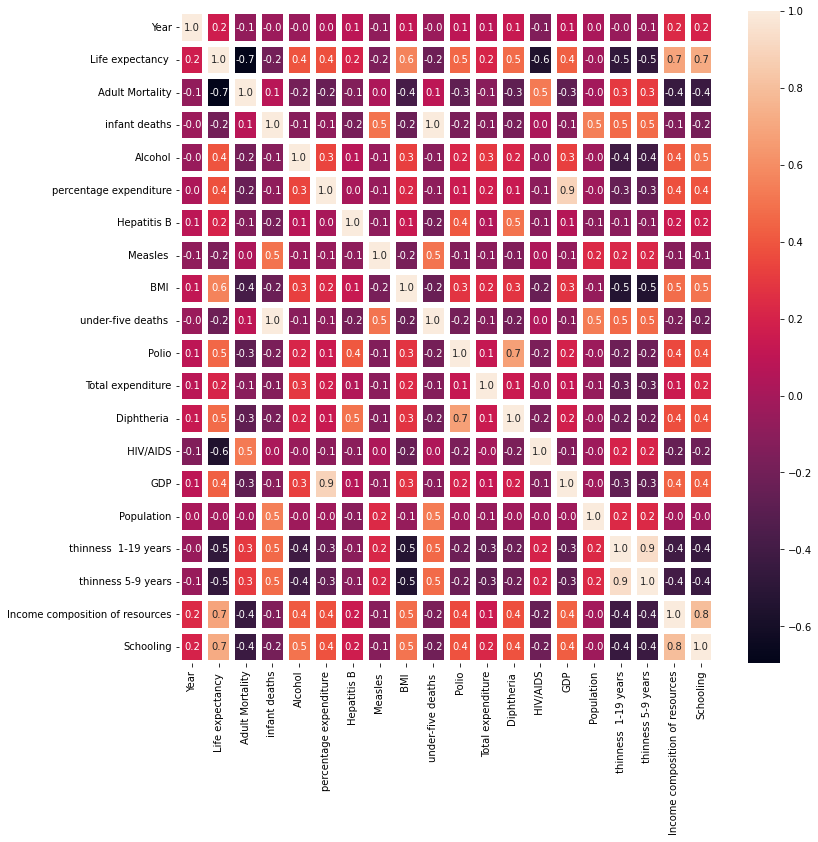

In [ ]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=5, fmt= '.1f', ax=ax)

Bazı değerler küçük bir miktarda olsa azalma ve artma göstermiş 

- Örn: Life expectancy --> Schooling (0.8) iken (0.7) olmuş

### Aykırı Değerler

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


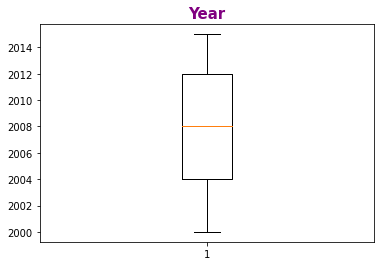

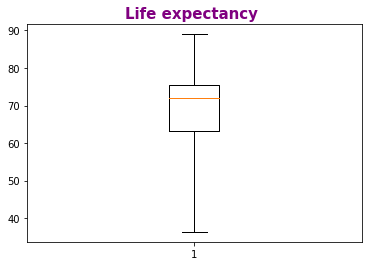

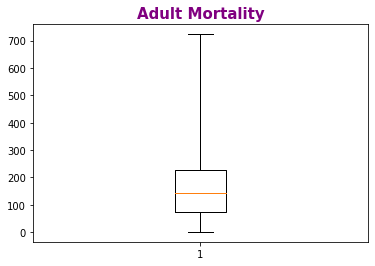

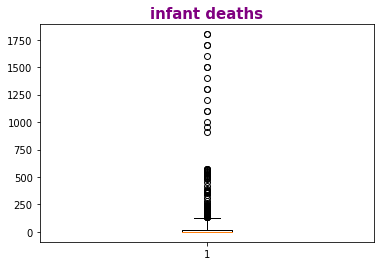

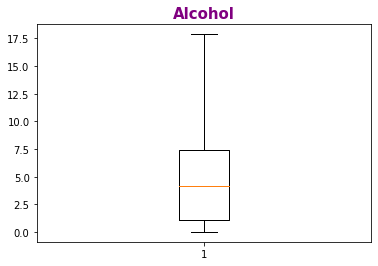

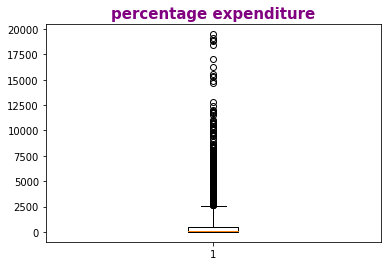

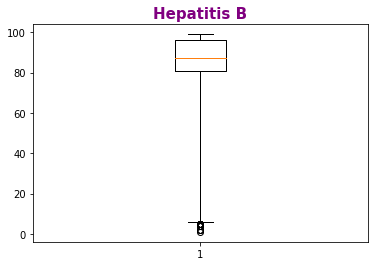

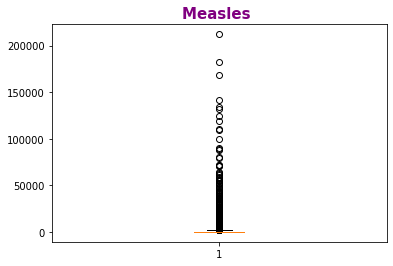

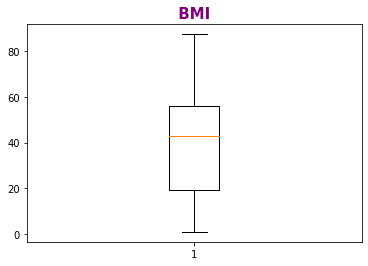

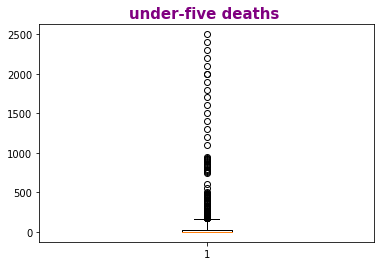

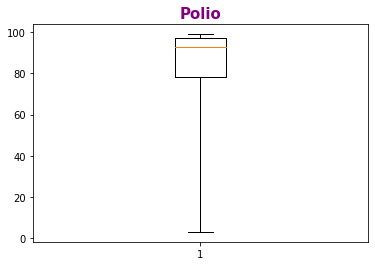

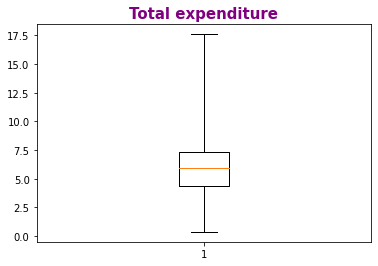

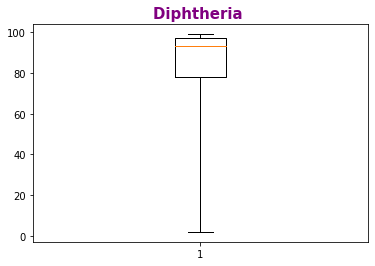

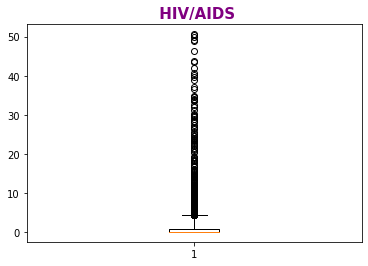

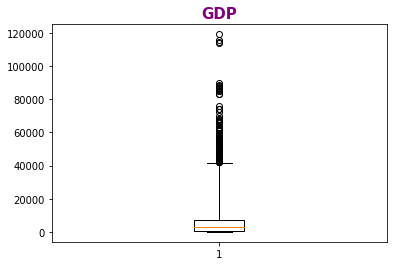

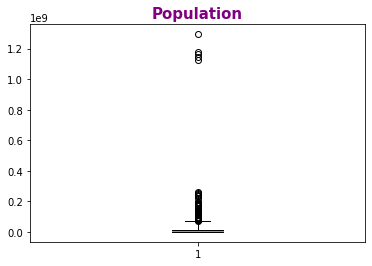

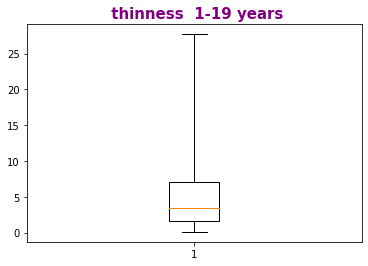

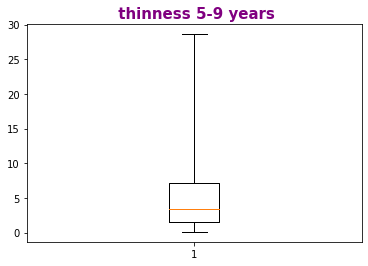

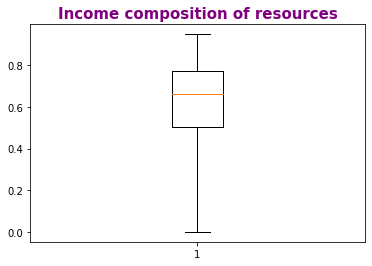

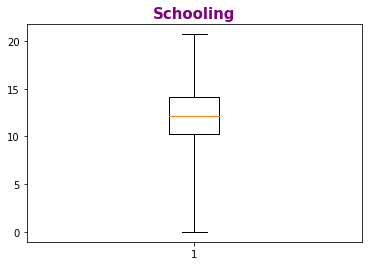

In [ ]:
def callPlotFun(columnName):
  baslik_font = {'family': 'arial', 'color': 'purple','weight': 'bold','size': 15 }
  eksen_font  = {'family': 'arial', 'color': 'green','weight': 'bold','size': 10 }
  
  plt.boxplot(df[columnName],whis=5)
  plt.title(columnName, fontdict=baslik_font)
  plt.show()

for i in df:
  if (df[i].dtypes!="O"):
    callPlotFun(i)

#### Garifklere göre odlukça aykırı değerlerin olduğunu gözlemliyoruz.
Aykırı değere sahip featurelar:

1. infant deaths
2. percentage expenditure
3. Hepatitis B
4. Measles 
5. under-five deaths 
6. HIV/AIDS
7. GDP
8. Population


#### Aykırı değerleri bulmanın bir diğer yöntemi olan Histogram ile bazı aykırı değere sahip featurelara bakalım


> Grafiklerde de verilerde ki aykırıkları kolaylıkla görebiliyoruz

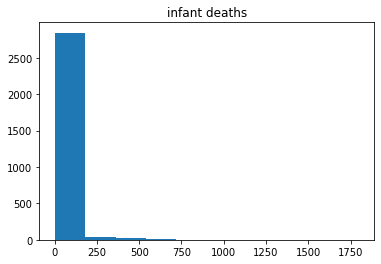

In [ ]:
plt.hist(df["infant deaths"])
plt.title("infant deaths")
plt.show()

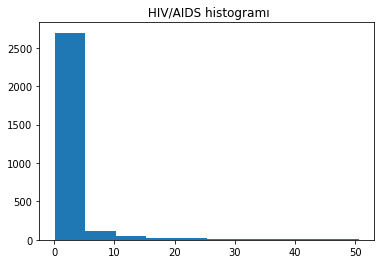

In [ ]:
plt.hist(df[" HIV/AIDS"])
plt.title(" HIV/AIDS histogramı")
plt.show()

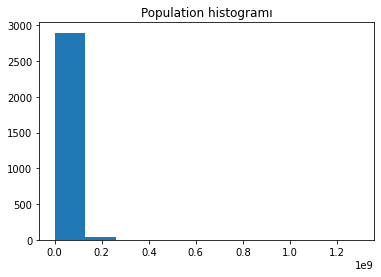

In [ ]:
plt.hist(df["Population"])
plt.title("Population histogramı")
plt.show()

#### Aykırı verileri ne yapacağız? 

1. Aykırı değerleri veri kümemizden çıkarabiliriz.

2. Aykırı değerlere yeni değerler atayarak sınırlayabiliriz.

3. Onları analizimiz için zararsız bir değere dönüştürürüz.

##### Aykırı verileri sınırlandırma

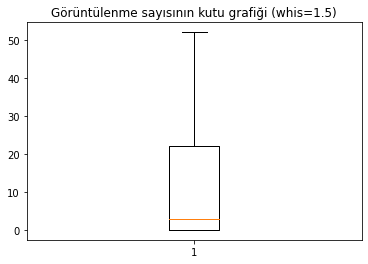

In [ ]:
from scipy.stats.mstats import winsorize

df["infant deaths"] = winsorize(df["infant deaths"], (0, 0.12))

df["infant deaths"]

plt.boxplot(df["infant deaths"])
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)")
plt.show()

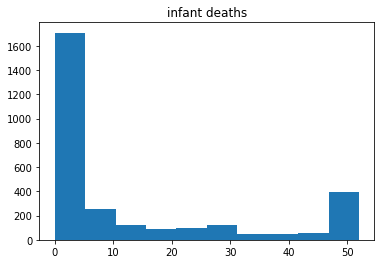

In [ ]:
plt.hist(df["infant deaths"])
plt.title("infant deaths")
plt.show()

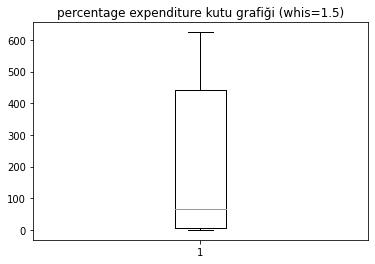

In [ ]:
df["percentage expenditure"] = winsorize(df["percentage expenditure"], (0, 0.2))
plt.boxplot(df["percentage expenditure"])
plt.title("percentage expenditure kutu grafiği (whis=1.5)")
plt.show()

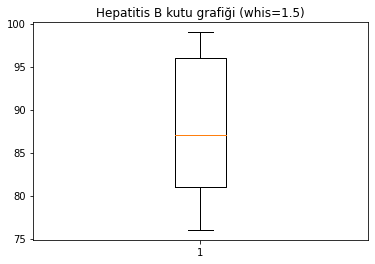

In [ ]:
df["Hepatitis B"] = winsorize(df["Hepatitis B"], (0.2, 0))
plt.boxplot(df["Hepatitis B"])
plt.title("Hepatitis B kutu grafiği (whis=1.5)")
plt.show()

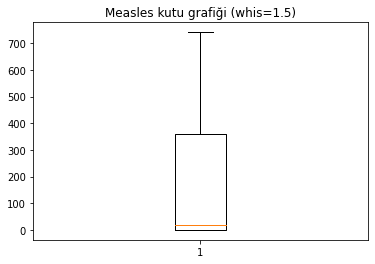

In [ ]:
df["Measles "] = winsorize(df["Measles "], (0, 0.2))
plt.boxplot(df["Measles "])
plt.title("Measles kutu grafiği (whis=1.5)")
plt.show()

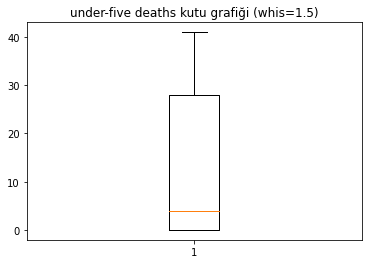

In [ ]:
df["under-five deaths "] = winsorize(df["under-five deaths "], (0, 0.2))
plt.boxplot(df["under-five deaths "])
plt.title("under-five deaths kutu grafiği (whis=1.5)")
plt.show()

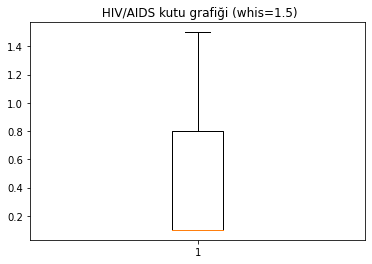

In [ ]:
df[" HIV/AIDS"] = winsorize(df[" HIV/AIDS"], (0, 0.2))
plt.boxplot(df[" HIV/AIDS"])
plt.title(" HIV/AIDS kutu grafiği (whis=1.5)")
plt.show()

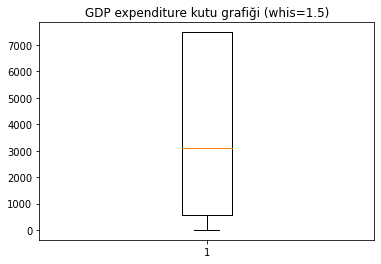

In [ ]:
df["GDP"] = winsorize(df["GDP"], (0, 0.2))
plt.boxplot(df["GDP"])
plt.title("GDP expenditure kutu grafiği (whis=1.5)")
plt.show()

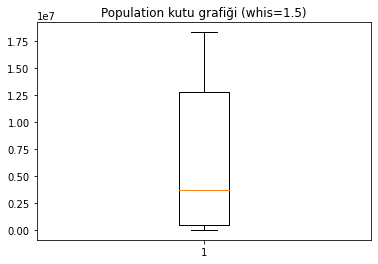

In [ ]:
df["Population"]= winsorize(df["Population"], (0, 0.1))
plt.boxplot(df["Population"])
plt.title("Population kutu grafiği (whis=1.5)")
plt.show()

#### Tüm aykırı verilerden kurtulduk. Fonskiyonumuzu çağırarak tekrar kontrol edelim

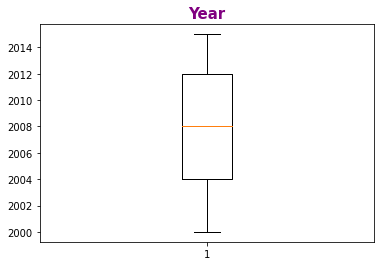

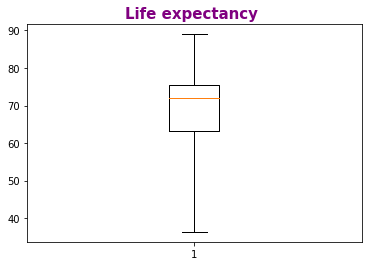

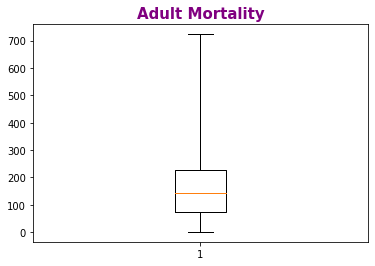

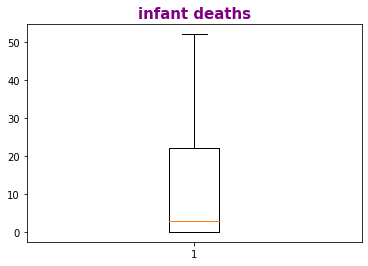

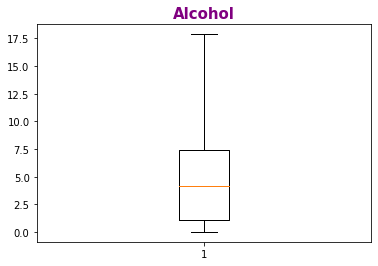

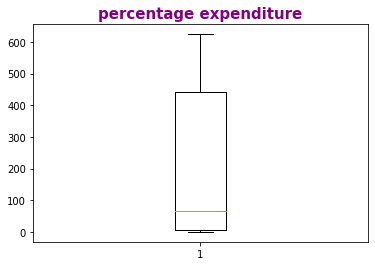

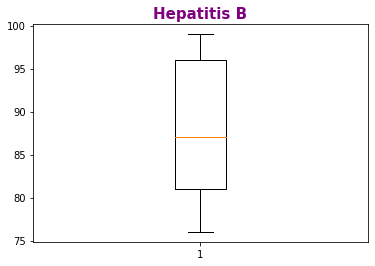

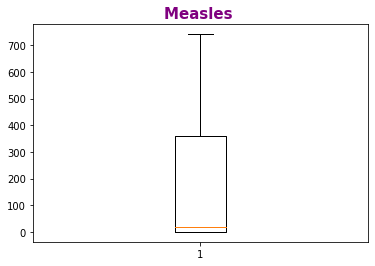

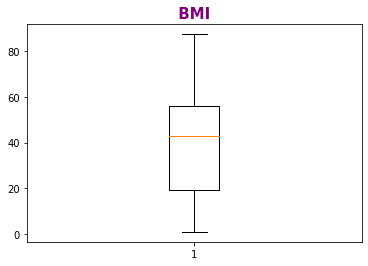

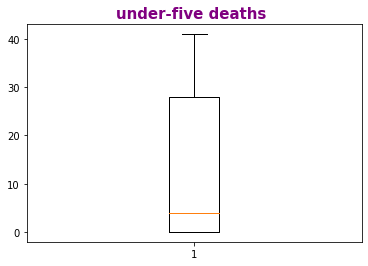

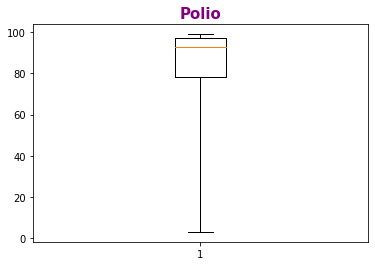

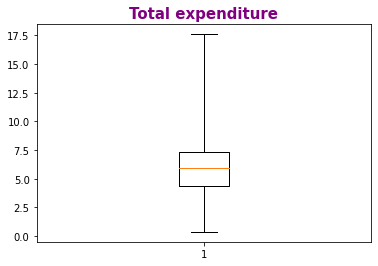

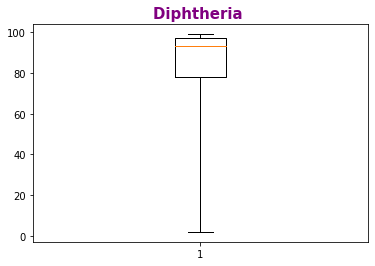

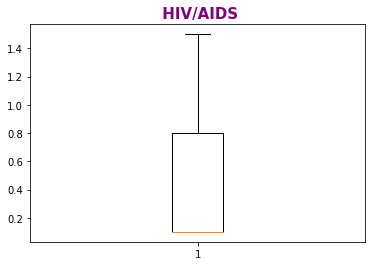

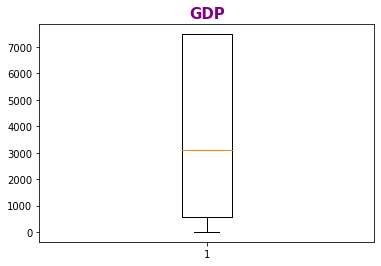

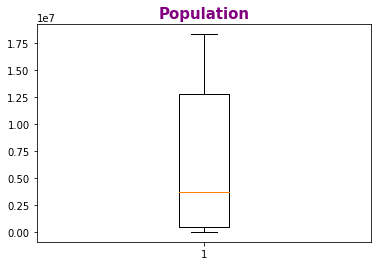

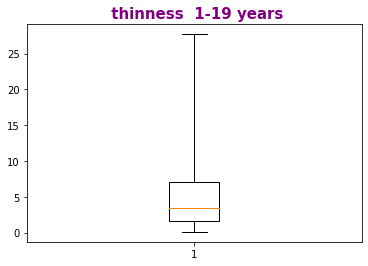

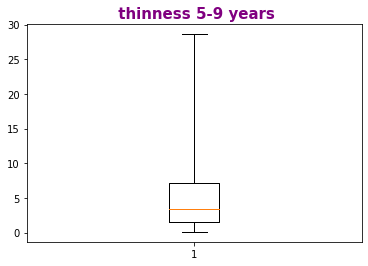

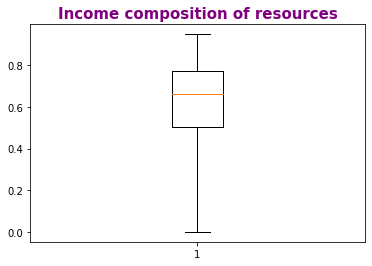

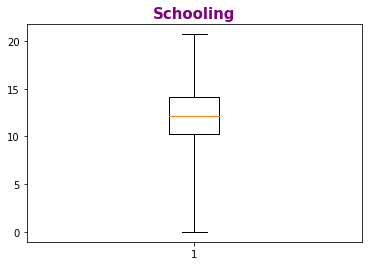

In [ ]:
for i in df:
  if (df[i].dtypes!="O"):
    callPlotFun(i)

##### Tüm aykırı verilerden kurtulduğumuzu gördük

### Dağılım

>  Featureların dağılımını inceleyelim

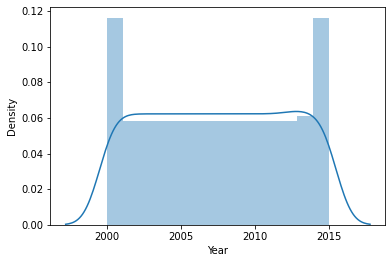

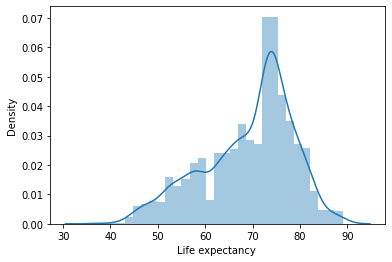

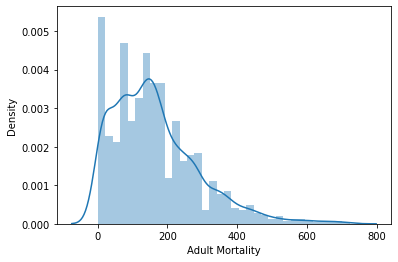

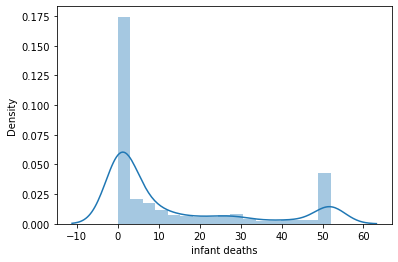

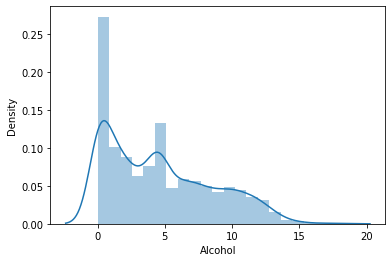

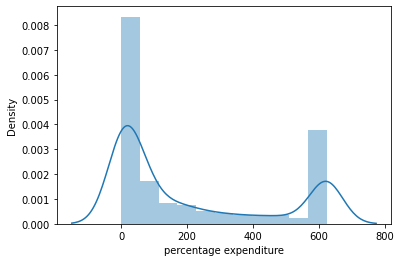

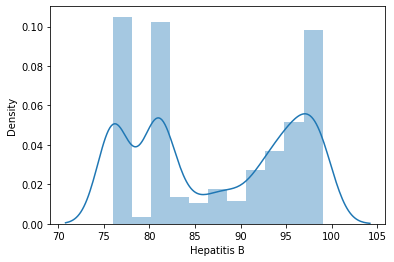

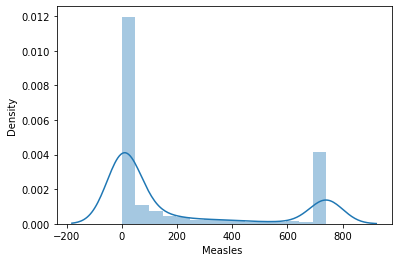

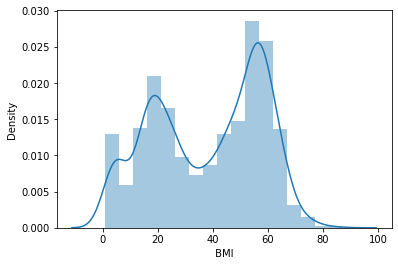

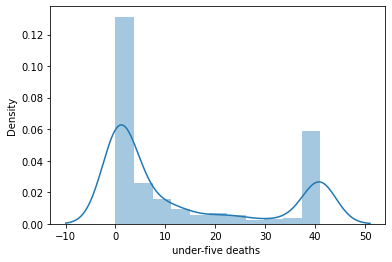

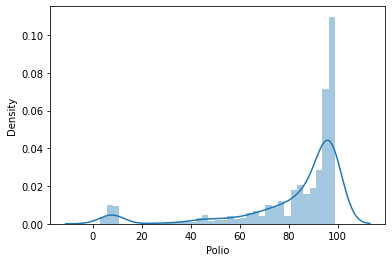

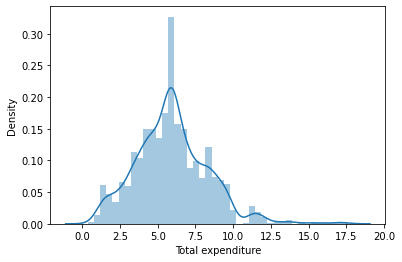

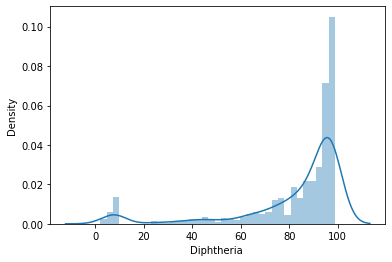

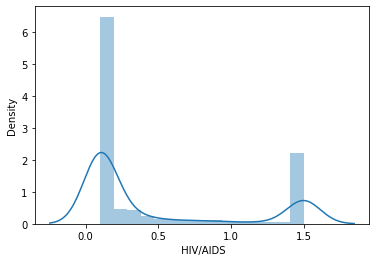

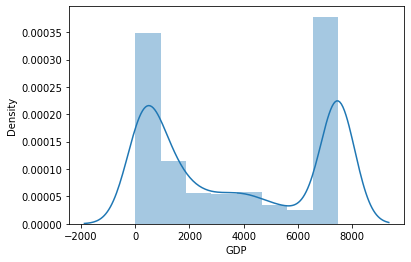

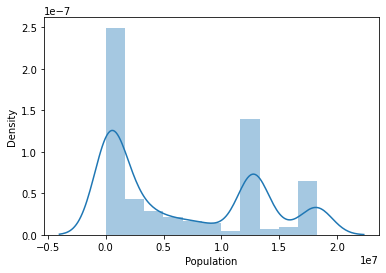

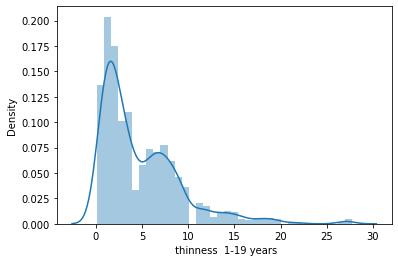

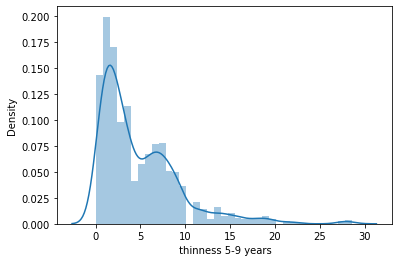

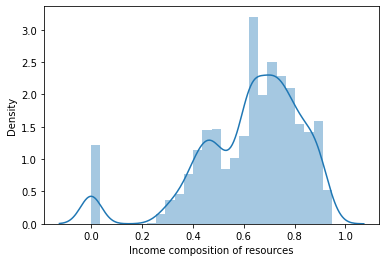

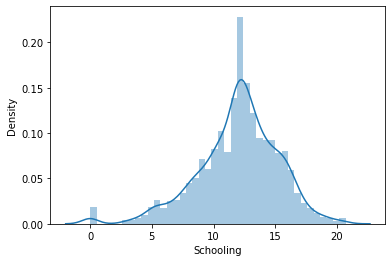

In [ ]:
for i in df:
  if (df[i].dtypes!="O"):
    sns.distplot(df[i])
    plt.show()

Grafiği yorumlarsak: 

1. Life expectancy, BMI, Polio, Diphtheria, Income composition of resources --> **sola çarpık**

2. Adult Mortality, infant deaths, Alcohol, Measles, Total expenditure, thinness  1-19 years, thinness 5-9 years  --> **sağa çarpık**

### Dublicate Dataları Yakalama

In [ ]:
df.duplicated().value_counts()

False    2938
dtype: int64

### Group BY

In [ ]:
df.groupby("Status").mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.541055,409.233288,88.417382,120.072266,51.803906,1.810547,93.736328,7.453051,93.476562,0.100000,5930.194976,5.757858e+06,1.320703,1.296680,0.831401,15.484285
Developing,2007.522671,67.107997,182.758848,15.780709,3.560670,166.194970,86.935439,220.644683,35.475772,15.697857,80.189387,5.618483,79.970386,0.547115,3269.080885,6.823264e+06,5.582378,5.624522,0.584529,11.255924


In [ ]:
df.groupby(by='Status')['Polio'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Developed,512.0,93.736328,10.783713,9.0,93.0,96.0,98.0,99.0
Developing,2426.0,80.189387,24.575585,3.0,74.0,91.0,97.0,99.0


### One Hot Encoding

In [ ]:
df.select_dtypes('object').nunique()

Country    193
Status       2
dtype: int64

In [ ]:
# pd.get_dummies(df["Status"]).head()
#df= pd.concat([df, pd.get_dummies(df["Status"])], axis=1)
#df.head()

Status kategorik değişkeni dummyledim

<a id="4"></a>
## 4. Veri Görselleştirme

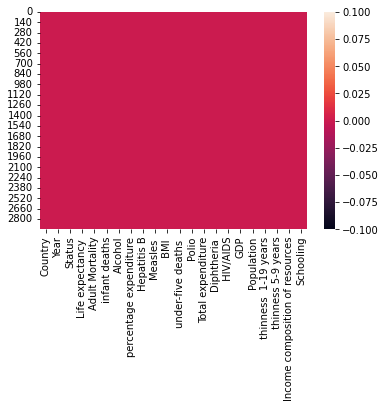

In [ ]:
# eksik verimiz var mı 
sns.heatmap(df.isnull())

In [ ]:
import plotly.express as px

fig = px.pie(df['Status'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Status', names='Type', title='Status Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Yaşam beklentisinin yıllar içindeki değişimi


* HIV/AIDS 

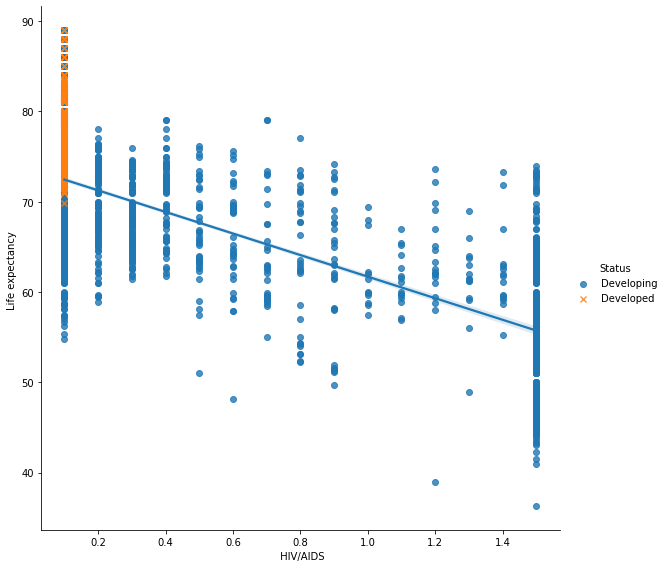

In [ ]:
sns.pairplot(df, x_vars=[" HIV/AIDS"], y_vars=["Life expectancy "],
             hue="Status",markers=["o", "x"], height=8, kind="reg");

> Gelişmekte olan ülkelerde yaşam beklentisi değeri hızlı bir aralıkta düştüğü için hiv/AIDS hastalığıyla mücadele edemedikleri gözlemlenmektedir

* Polio (felç)

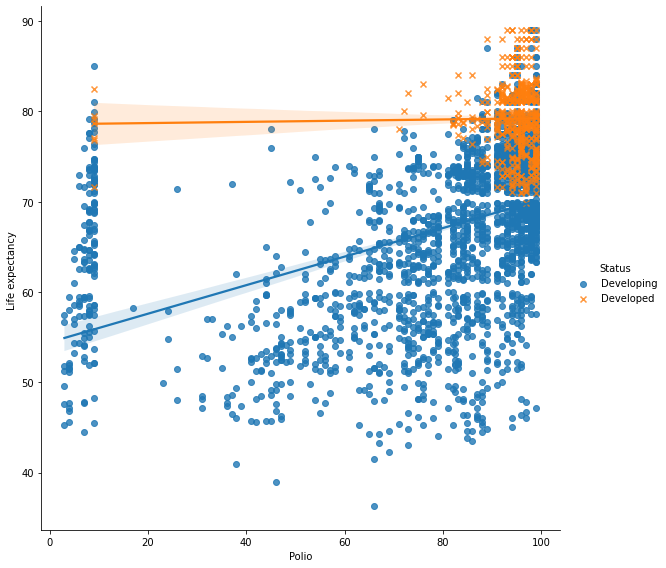

In [ ]:
sns.pairplot(df, x_vars=["Polio"], y_vars=["Life expectancy "],
             hue="Status",markers=["o", "x"], height=8, kind="reg");

> Gelişmiş ülkelerde aşılar sayesinde çocuk felci hastalığıyla mücadele ediliğini gözlemliyoruz.

> Gelişmekte olan ülkelerde ise hastlıkla mücadelenin giderek arttığı gözlemlenmektedir

* Hebatit B

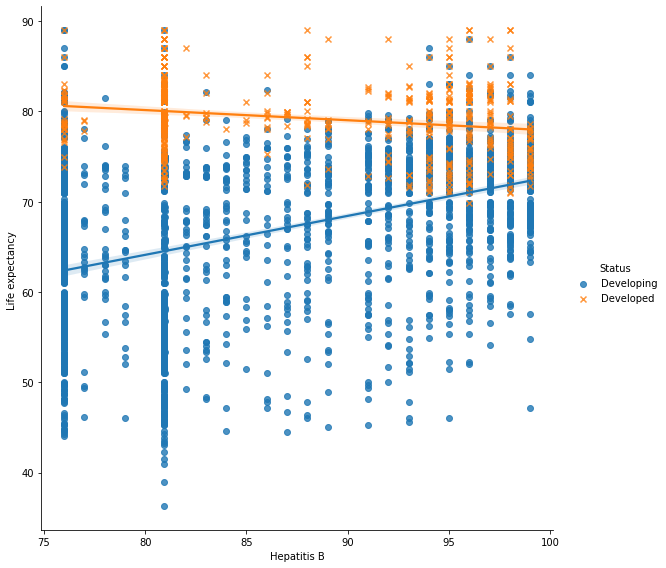

In [ ]:
sns.pairplot(df, x_vars=["Hepatitis B"], y_vars=["Life expectancy "],
             hue="Status",markers=["o", "x"], height=8, kind="reg");

> Gelişmiş ülkelerde life expectancy değerinde hafif bir azalma olduğu gözlemlenmektedir. 

> Gelişmekte olan ülkelerde life expectancy değeri giderek yükseliyor, bu da gelişmekte olan ülkelerin hepatit B aşısı için tedbirler aldığı anlamını çıkarabiliriz


* Measles (Kızamık)

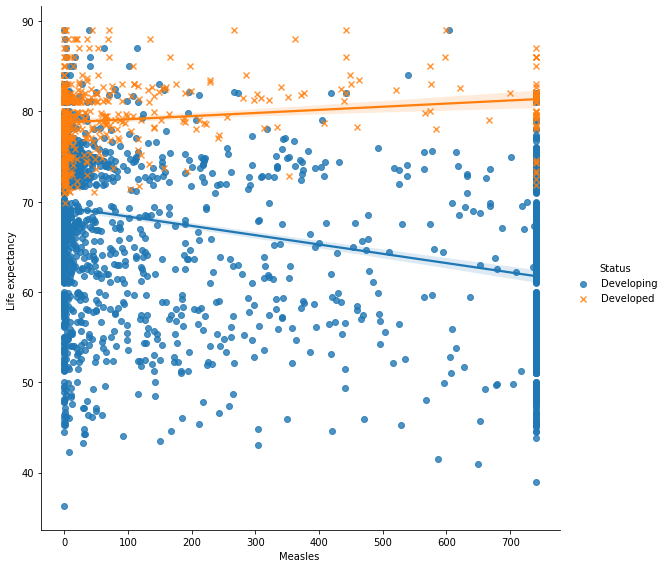

In [ ]:
sns.pairplot(df, x_vars=["Measles "], y_vars=["Life expectancy "],
             hue="Status",markers=["o", "x"], height=8, kind="reg");

> Gelişmiş ülkelerde Kızamık hastalığına ilişkin aşılar olduğundan life expectancy artışta olduğu gözlemlenmektedir

> Gelişmekte olan ülkelerde ise yaşam beklentisi değeri düşüş göstermiştir. Bundan da kızamıkla ilgili mücadelede aşı/ilaç kaynak yetersizliği olduğunu çıkartabiliriz

#### Schooling ve Alcohol 'ün Expectancy deki etkisi

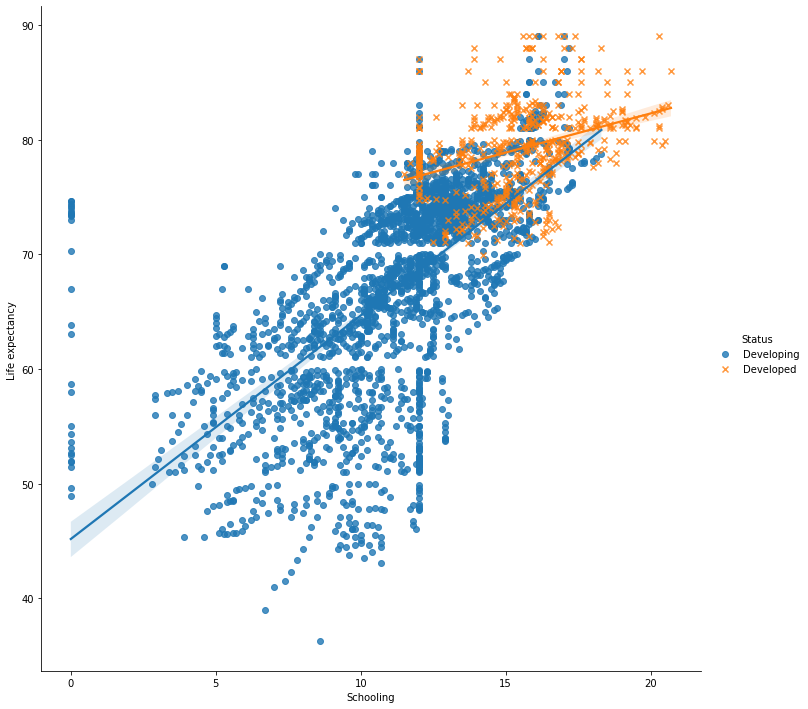

In [ ]:
sns.pairplot(df, x_vars=["Schooling"], y_vars=["Life expectancy "],
             hue="Status",markers=["o", "x"], height=10, kind="reg")

> Gelişmiş ülkelerde Schooling life exp yüksek etkilediği gözlemlenmektedir


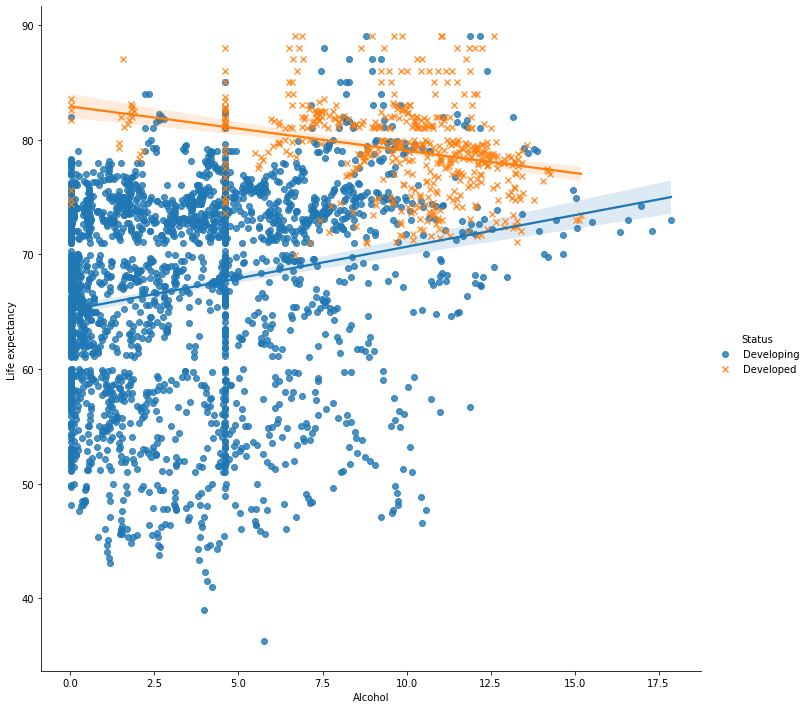

In [ ]:
sns.pairplot(df, x_vars=["Alcohol"], y_vars=["Life expectancy "],
             hue="Status",markers=["o", "x"], height=10, kind="reg")

> Gelişmiş ülkelerde negatif, Gelişmekte olan ülkelerde pozitif bir etkisi olduğu gözlemlenmektedir

In [ ]:
df_ = df.drop(['Year','Country'],axis=1)

In [ ]:
y=df_['Life expectancy ']
X=df_.drop('Life expectancy ',axis=1)
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)

In [ ]:
X=pd.concat([X,status_dummy],axis=1)
X.shape

(2938, 20)

##### Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 1. Linear Regression

In [ ]:
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-1.82457247e-02 -2.59246418e-02  3.97083314e-03  2.25688826e-03
 -4.59870087e-02 -4.41910933e-04  3.67739305e-03 -5.16921325e-02
  1.35399814e-02  6.55416231e-02  2.83797259e-02 -6.22787032e+00
  2.85386112e-05  5.01873987e-08 -2.27942156e-02 -6.46656780e-02
  7.71514754e+00  2.16808043e-01  9.31027943e-01 -9.31027943e-01]
Sabit değer (bias): 
 68.94778402076457


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     653.4
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:59:50   Log-Likelihood:                -6471.4
No. Observations:                2350   AIC:                         1.298e+04
Df Residuals:                    2330   BIC:                         1.310e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mortality                    -0.0182      0.001    -22.095      0.000      -0.020      -0.017
infant deaths                      -0.0259      0.016     -1.580      0.114      -0.058       0.006
Alcohol                             0.0040      0.027      0.145      0.884      -0.050       0.058
percentage expenditure              0.0023      0.000      5.540      0.000       0.001       0.003
Hepatitis B                        -0.0460      0.012     -3.900      0.000      -0.069      -0.023
Measles                            -0.0004      0.000     -1.317      0.188      -0.001       0.000
 BMI                                0.0037      0.005      0.690      0.491      -0.007       0.014
under-five deaths                  -0.0517      0.019     -2.743      0.006      -0.089      -0.015
Polio                               0.0135      0.005      2.804      0.005       0.004       0.023
Total expenditure                   0.0655      0.036      1.839      0.066      -0.004       0.135
Diphtheria                          0.0284      0.005      5.909      0.000       0.019       0.038
 HIV/AIDS                          -6.2279      0.205    -30.365      0.000      -6.630      -5.826
GDP                              2.854e-05   3.31e-05      0.863      0.388   -3.63e-05    9.34e-05
Population                       5.019e-08    1.4e-08      3.591      0.000    2.28e-08    7.76e-08
 thinness  1-19 years              -0.0228      0.052     -0.437      0.662      -0.125       0.079
 thinness 5-9 years                -0.0647      0.052     -1.250      0.211      -0.166       0.037
Income composition of resources     7.7151      0.691     11.158      0.000       6.359       9.071
Schooling                           0.2168      0.046      4.665      0.000       0.126       0.308
Developed                          69.8788      1.094     63.870      0.000      67.733      72.024
Developing                         68.0168      1.063     63.969      0.000      65.932      70.102
==============================================================================
Omnibus:                       99.270   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.059
Skew:                          -0.213   Prob(JB):                     3.71e-54
Kurtosis:                       4.527   Cond. No.                     1.79e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared:	0.842 olduğu görüyoruz, bu modelimizin güzel olduğunu göstermektedir

Veri setimizden bir kaç feature çıkartarak yeniden eğitelim

In [ ]:
y_ =df['Life expectancy ']
X_ =df.drop(columns=['Life expectancy ','GDP', 'Income composition of resources', 'Country'],axis=1)
X_['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
status_dummy=pd.get_dummies(X_['Status'])
X_.drop(['Status'],inplace=True,axis=1)

In [ ]:
X_= pd.concat([X_,status_dummy],axis=1)
X_.shape

# train_test
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_, y_, test_size=0.20, random_state=42)

In [ ]:
lrm = linear_model.LinearRegression()
lrm.fit(X_train_2, y_train_2)

LinearRegression()

In [ ]:
X_ = sm.add_constant(X_train_2)
results = sm.OLS(y_train_2, X_train_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     668.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:59:51   Log-Likelihood:                -6502.8
No. Observations:                2350   AIC:                         1.304e+04
Df Residuals:                    2331   BIC:                         1.315e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       0.1461      0.018      7.901      0.000       0.110       0.182
Adult Mortality           -0.0189      0.001    -22.694      0.000      -0.021      -0.017
infant deaths             -0.0174      0.017     -1.046      0.296      -0.050       0.015
Alcohol                    0.0375      0.028      1.347      0.178      -0.017       0.092
percentage expenditure     0.0030      0.000      7.903      0.000       0.002       0.004
Hepatitis B               -0.0539      0.012     -4.467      0.000      -0.078      -0.030
Measles                 -4.02e-05      0.000     -0.118      0.906      -0.001       0.001
 BMI                       0.0064      0.005      1.182      0.237      -0.004       0.017
under-five deaths         -0.0635      0.019     -3.329      0.001      -0.101      -0.026
Polio                      0.0156      0.005      3.185      0.001       0.006       0.025
Total expenditure          0.0116      0.036      0.320      0.749      -0.059       0.082
Diphtheria                 0.0302      0.005      6.210      0.000       0.021       0.040
 HIV/AIDS                 -6.4207      0.208    -30.910      0.000      -6.828      -6.013
Population              6.147e-08   1.33e-08      4.611      0.000    3.53e-08    8.76e-08
 thinness  1-19 years     -0.0413      0.053     -0.782      0.434      -0.145       0.062
 thinness 5-9 years       -0.0666      0.052     -1.272      0.204      -0.169       0.036
Schooling                  0.4571      0.039     11.772      0.000       0.381       0.533
Developed               -220.6376     36.857     -5.986      0.000    -292.914    -148.361
Developing              -222.8407     36.865     -6.045      0.000    -295.133    -150.548
==============================================================================
Omnibus:                       90.812   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.961
Skew:                          -0.224   Prob(JB):                     5.13e-45
Kurtosis:                       4.372   Cond. No.                     6.09e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Çıkarttığım featurelar sonucu R-squared değerim az miktarda da olsa düştü. (0.842 --> 0.838 ) 

> F statistic değerim arttı (	653.4 --> 668.3 )

>

In [ ]:
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2350
Test kümesindeki gözlem sayısı   : 588


Feature çıkarmadan önceki R Square değeri daha yüksek olduğu için o dğerlerle devam ediyorum

In [ ]:
X_train = sm.add_constant(X_train)
sonuclar = sm.OLS(y_train, X_train).fit()

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


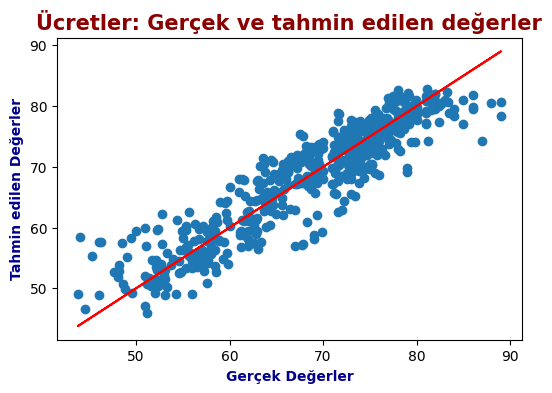

Ortalama Mutlak Hata (MAE)        : 2.767619143229563
Ortalama Kare Hata (MSE)          : 13.273092920766477
Kök Ortalama Kare Hata (RMSE)     : 3.6432256203488795
Ortalama Mutlak Yüzde Hata (MAPE) : 4.195752056175123


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Yüzde Hata : %4 olması modelin hata oranın düşük oldugunu gösterir

#### Ridge Reg

In [ ]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=0.01) 
ridgeregr.fit(X_train, y_train)

y_egitim_tahmini = ridgeregr.predict(X_train)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8419659296068313
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8469061421295941
Ortalama Mutlak Hata (MAE)        : 2.7675896370339594
Ortalama Kare Hata (MSE)          : 13.272702053576651
Kök Ortalama Kare Hata (RMSE)     : 3.6431719769421607
Ortalama Mutlak Yüzde Hata (MAPE) : 4.195711499464308


alpha = 10**25 oldugunda Hata yüzdesi 11.93 geliyor

alphayı = 0.01 e düşürünce hata yüzdesi 4 de düştü

#### Lasso Reg

In [ ]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=0.01) 
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8418762871924799
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8481233026879823
Ortalama Mutlak Hata (MAE)        : 2.7599277416923327
Ortalama Kare Hata (MSE)          : 13.167178490008698
Kök Ortalama Kare Hata (RMSE)     : 3.628660701968248
Ortalama Mutlak Yüzde Hata (MAPE) : 4.185804780186941


### 2. Random Forest Regression

In [ ]:
df = df.drop(['Year','Country'],axis=1)

y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
X['Status'].unique()

status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)

X=pd.concat([X,status_dummy],axis=1)
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

print(np.concatenate((y_pred.reshape(len(y_test),1), y_test.reshape(len(y_test),1)),1))

[[73.08 73.7 ]
 [75.8  75.9 ]
 [74.99 74.2 ]
 ...
 [64.65 61.1 ]
 [70.34 69.6 ]
 [73.49 74.  ]]


In [ ]:
accuracy_score =  regressor.score(X_test,y_test)
print(accuracy_score)

0.9665222505782751


In [ ]:
print('Random Forest Accuracy:',(accuracy_score)*100,'%')

Random Forest Accuracy: 96.65222505782751 %


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred)**(0.5))

1.7036442678098895


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(regressor,X_train,y_train,cv=10)
accuracies.mean()

0.9564073188551632

### Featureları önem derecesine göre sıralayalım



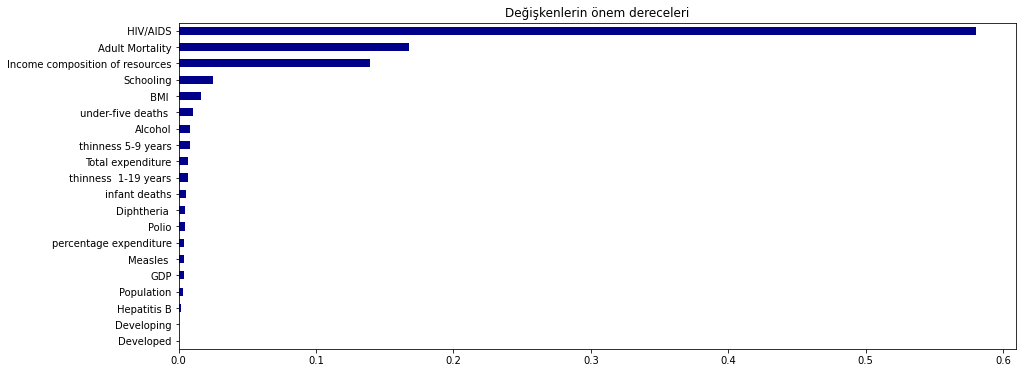

In [ ]:
importance_level = pd.Series (data = regressor.feature_importances_, index=X_train.columns)
importance_level_sort = importance_level.sort_values()

plt.figure(figsize=(15,6))
importance_level_sort.plot(kind="barh", color="darkblue")
plt.title("Değişkenlerin önem dereceleri")
plt.show()

1. HIV/AIDS : 1000 canlı doğumda ölüm HIV/AIDS (0-4 yaş)

2. Adult Mortality: Erişkin ölüm oranı 

3. Income composition of resources : Kaynakların gelir bileşimi açısından İnsani Gelişme Endeksi

<a id="5"></a>
## 5. Regression


In [ ]:
df_ = df.drop(['Year','Country'],axis=1)

KeyError: ignored

In [ ]:
y=df_['Life expectancy ']
X=df_.drop('Life expectancy ',axis=1)
X['Status'].unique()

In [ ]:
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)

In [ ]:
X=pd.concat([X,status_dummy],axis=1)
X.shape

##### Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 1. Linear Regression

In [ ]:
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)

In [ ]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

R-squared:	0.842 olduğu görüyoruz, bu modelimizin güzel olduğunu göstermektedir

Veri setimizden bir kaç feature çıkartarak yeniden eğitelim

In [ ]:
y_ =df['Life expectancy ']
X_ =df.drop(columns=['Life expectancy ','GDP', 'Income composition of resources', 'Country'],axis=1)
X_['Status'].unique()

In [ ]:
status_dummy=pd.get_dummies(X_['Status'])
X_.drop(['Status'],inplace=True,axis=1)

In [ ]:
X_= pd.concat([X_,status_dummy],axis=1)
X_.shape

# train_test
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_, y_, test_size=0.20, random_state=42)

In [ ]:
lrm = linear_model.LinearRegression()
lrm.fit(X_train_2, y_train_2)

In [ ]:
X_ = sm.add_constant(X_train_2)
results = sm.OLS(y_train_2, X_train_2).fit()
results.summary()

> Çıkarttığım featurelar sonucu R-squared değerim az miktarda da olsa düştü. (0.842 --> 0.838 ) 

> F statistic değerim arttı (	653.4 --> 668.3 )

>

In [ ]:
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Feature çıkarmadan önceki R Square değeri daha yüksek olduğu için o dğerlerle devam ediyorum

In [ ]:
X_train = sm.add_constant(X_train)
sonuclar = sm.OLS(y_train, X_train).fit()

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error


In [ ]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Ortalama Mutlak Yüzde Hata : %4 olması modelin hata oranın düşük oldugunu gösterir

#### Ridge Reg

In [ ]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=0.01) 
ridgeregr.fit(X_train, y_train)

y_egitim_tahmini = ridgeregr.predict(X_train)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

alpha = 10**25 oldugunda Hata yüzdesi 11.93 geliyor

alphayı = 0.01 e düşürünce hata yüzdesi 4 de düştü

#### Lasso Reg

In [ ]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=0.01) 
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

### 2. Random Forest Regression

In [ ]:
df = df.drop(['Year','Country'],axis=1)

y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
X['Status'].unique()

status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)

X=pd.concat([X,status_dummy],axis=1)
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

print(np.concatenate((y_pred.reshape(len(y_test),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
accuracy_score =  regressor.score(X_test,y_test)
print(accuracy_score)

In [ ]:
print('Random Forest Accuracy:',(accuracy_score)*100,'%')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred)**(0.5))

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(regressor,X_train,y_train,cv=10)
accuracies.mean()

### Featureları önem derecesine göre sıralayalım



In [ ]:
importance_level = pd.Series (data = regressor.feature_importances_, index=X_train.columns)
importance_level_sort = importance_level.sort_values()

plt.figure(figsize=(15,6))
importance_level_sort.plot(kind="barh", color="darkblue")
plt.title("Değişkenlerin önem dereceleri")
plt.show()

1. HIV/AIDS : 1000 canlı doğumda ölüm HIV/AIDS (0-4 yaş)

2. Adult Mortality: Erişkin ölüm oranı 

3. Income composition of resources : Kaynakların gelir bileşimi açısından İnsani Gelişme Endeksi

<a id="6"></a>
## 6. Supervised ML 

### 1. KNN

> #### KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection

In [ ]:
y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
X['Status'].unique()

status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

In [ ]:
knn_model.n_neighbors

In [ ]:
knn_model.effective_metric_

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
# mse 
np.sqrt(mean_squared_error(y_test, y_pred))

##### k'nın farklı değerleri için, mse hesaplayalım

In [ ]:
komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komşu Sayısı', fontdict= eksen_font)
plt.ylabel('Doğruluk', fontdict= eksen_font)
plt.show()

komsu sayısını manuel olarak 8 girelim ve sonuca bakalım.

n = 5 iken --> mse : 8.466 idi.

In [ ]:
knn_model_2 = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
y_pred_2 = knn_model_2.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_2))

n=8 olduğunda mse'nin az arttıgını gözlemliyoruz

##### Grid Search ile optimum k değerine bakalım

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

In [ ]:
print("K 'nın en iyi değeri :",knn_cv_model.best_params_["n_neighbors"])

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
RMSE=[]
RMSE_CV=[]

for k in range(10):
  k = k+1
  knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
  y_pred = knn_model.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train,y_pred))
  rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean())
  RMSE.append(rmse)
  RMSE_CV.append(rmse_cv)

  print("k=",k, " için RMSE değeri: {:.2f}".format(rmse), "***"," RMSE CV değeri: {:.2f}".format(rmse_cv))

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

In [ ]:
def knn_reg_accurarcy():

  pred_ = knn_cv_model.predict(X_test)
  err = abs(pred_ - y_test)
  mape = 100 * (err/y_test)
  acc = 100 - np.mean(mape)
  print("KNN Reg accurarcy : %", round(acc,2))

knn_reg_accurarcy()

### 2. Desicion Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

In [ ]:
prediction_dt = dt_reg.predict(X_test)
err= abs(prediction_dt - y_test)
mape = 100 * (err/y_test)
acc = 100 - np.mean(mape)
print("Decision Tree Reg accurarcy : %", round(acc,2))

##### Decision Tree max depth

In [ ]:
dt_reg = DecisionTreeRegressor(max_depth=7)
dt_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

##### **RMSE değeri düştü ( 3.41 --> 2.47 )**

In [ ]:
prediction_dt = dt_reg.predict(X_test)
err= abs(prediction_dt - y_test)
mape = 100 * (err/y_test)
acc = 100 - np.mean(mape)
print("Decision Tree Reg accurarcy : %", round(acc,2))

### 3. Random search

In [ ]:
y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
import time
start = time.time()

hyperparameter_space = {'max_depth':[5,6,10,15,20,25,27,28,30], 
                        'min_samples_leaf':[3,5,6,8,11,13,15,20],
                        'min_samples_split':[1,3,4,6,8,10,20,22]
                        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(dt_reg, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)
rs.fit(X_train, y_train)

In [ ]:
print("Optimal hipermarametreler", rs.best_params_)
rs.best_estimator_.fit(X_train, y_train)

In [ ]:
y_pred = rs.best_estimator_.predict(X_test) # Predictions

In [ ]:
err = abs(y_pred - y_test)
mape = 100 * (err/y_test)
acc = 100 - np.mean(mape)
print("Random Search accurarcy : %", round(acc,2))


#####Optimum değerlerle ağaç çizdirelim

In [ ]:
karar_agaci = DecisionTreeRegressor(
    max_features=3,
    max_depth=28,
    min_samples_leaf=20,
    min_samples_split=8,
    random_state = 1337
)

In [ ]:
karar_agaci.fit(X, y)

In [ ]:
from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)
tree.plot_tree(decision_tree = karar_agaci,
               feature_names=X.columns,
               filled = True
              )
plt.show()

### 4. Support Vector Machines

#### çalışması uzun sürdüğünden svr algoritması sonucunu göremedim

In [ ]:
from sklearn.svm import SVR

In [ ]:
y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


SVR_REg alttaki kodun çalışması saatler sürmesine rağmen sonuç dönmediğinden çalışmasını durdurdum

In [ ]:
#svr_reg = SVR(kernel='linear', C=1)
#svr_reg.fit(X_train, y_train)
#y_predict = svr_reg.predict(X_test)
#rmse_test = MSE(y_test, y_predict)**(1/2)
#print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

In [ ]:
#pred_ = svr_reg.predict(X_test)
#err = abs(pred_ - y_test)
#mape = 100 * (err/y_test)
#acc = 100 - np.mean(mape)
#print("SVM Reg accurarcy : %", round(acc,2))


In [ ]:
#kernel_list = ['linear', 'rbf', 'poly']

#plt.figure(figsize=(15,4), dpi=100)
#for i, kernel in enumerate(kernel_list):
#    svr_reg = SVR(kernel=kernel).fit(X, y)
#    plt.subplot(1,3,i+1)
#    plotSVC('kernel=' + str(kernel))
#plt.show()

In [ ]:
#pred_ = svr_reg.predict(X_test)
#err = abs(pred_ - y_test)
#mape = 100 * (err/y_test)
#acc = 100 - np.mean(mape)
#print("SVM Reg accurarcy : %", round(acc,2))

### 5. Boosting with XGBOOST

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [ ]:
xg_reg.fit(X_train,y_train)
y_tahmin = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_tahmin))
print("RMSE: %f" % (rmse))

In [ ]:
pred_ = xg_reg.predict(X_test)
err = abs(pred_ - y_test)
mape = 100 * (err/y_test)
acc = 100 - np.mean(mape)
print("XGboost accurarcy : %", round(acc,2))

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [ ]:
#Modelimizi eğittik. Şimdi performansına bakalım.
y_tahmin_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_tahmin_gblinear))
print("RMSE: %f" % (rmse))

In [ ]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' ve 'gblinear' karşılaştırması", size = 14)
ax1 = plt.scatter(y_test, y_tahmin)
ax2 = plt.scatter(y_test, y_tahmin_gblinear, alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

#### XGBoost ile Çapraz Doğrulama
>  Modelin kalitesini arttırma

In [ ]:
yaşam_kalitesi_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
yaşam_kalitesi_cv = xgb.cv(dtrain=yaşam_kalitesi_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(yaşam_kalitesi_cv.sort_values(by='test-rmse-mean').head(5))

Rmse değeri 96. iterasyonda 2.06 ' a düştü

####Regularize

In [ ]:
yaşam_kalitesi_dmatrix = xgb.DMatrix(data=X, label=y)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=yaşam_kalitesi_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])



print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

Model alpha 0.13 da en başarılı sonucu verdi

In [ ]:
# hyper parametre ayarlama
import matplotlib.pyplot as plt
yaşam_kalitesi_dmatrix = xgb.DMatrix(data=X, label=y)

en_iyi_parametreler = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3
                      }

yaşam_kalitesi_modeli = xgb.train(params=en_iyi_parametreler, dtrain=yaşam_kalitesi_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(yaşam_kalitesi_modeli)
ax.figure.set_size_inches(20,8)
plt.show()

In [ ]:
# ax1 = xgb.plot_tree(yaşam_kalitesi_modeli, num_trees=5)
# ax1.figure.set_size_inches(30,30)
# plt.show()

### 6. Boosting with Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
y=df['Life expectancy ']
X=df.drop('Life expectancy ',axis=1)
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Status'],inplace=True,axis=1)
X=pd.concat([X,status_dummy],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'num_leaves':128,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [ ]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_tahmin = lgb_reg_model.predict(X_test)
y_tahmin_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_tahmin))
print("RMSE: %f" % (rmse))

In [ ]:
pred_ = lgb_reg_model.predict(X_test)
err = abs(pred_ - y_test)
mape = 100 * (err/y_test)
acc = 100 - np.mean(mape)
print("Light GBM accurarcy : %", round(acc,2))

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Gerçek Değerler & Tahminler\n', size = 14)
ax1 = plt.scatter(y_test, y_tahmin)
ax2 = plt.scatter(y_train, y_tahmin_train,alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Kümesi', 'Eğitim Kümesi'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.show()

> ### **Accurarcy List**

**Linear Regression** R Square : 0,842 

Linear Regression R Square Feature çıkarttığımızda : 0.838

Linear Regression Ridge : 0.841

Linear Regression Lasso : 0.841

**Random Forest** Acc : %96.66

Random Forest Cross Val Acc : %95

**KNN** Regression Acc : %90.40

**Decision Tree** Regression Acc : %96.21

**Decision Tree** Regression Acc MAX *depth = 7* : %97.38

**Random Search** Acc: %97.63

**XGBoost** Acc :  % 97.71

**Light GBM** Acc : % 98.23

## Acc Tablosuna göre modelimiz en iyi **Light GBM (%98.71)** modelinde çalışmaktadır